## 基于geopandas的空间数据分析—数据结构篇  

geopandas作为pandas向地理分析计算方面的延拓，基础的数据结构延续了Series和DataFrame的特点，创造出GeoSeries与GeoDataFrame两种基础数据结构：  

#### 1.GeoSeries
##### 1.1 GeoSeries中的基础几何对象
与Series相似，GeoSeries用来表示一维向量，只不过这里的向量每个位置上的元素都表示着一个shapely中的几何对象，有如下几种类型：  
##### 1.1.1Points
对应shapely.geometry中的Point，用于表示单个点，下面我们创建一个由若干Point对象组成的GeoSeries并像Series一样定义索引：


In [3]:
from shapely import geometry
import geopandas as gpd

# 创建存放Point对象的GeoSeries
# 这里shapely.geometry.Point(x, y)用于创建单个点对象
gpd.GeoSeries([geometry.Point(0, 0),
               geometry.Point(0, 1),
               geometry.Point(1, 1),
               geometry.Point(1, 0)],
              index=['a', 'b', 'c', 'd'])

a    POINT (0.00000 0.00000)
b    POINT (0.00000 1.00000)
c    POINT (1.00000 1.00000)
d    POINT (1.00000 0.00000)
dtype: geometry

可以看到创建出的GeoSeries数据类型为geometry，即几何对象。  
##### 1.1.2 MultiPoint  
对应shapely中的MultiPoint，用于表示多个点的集合，下面我们创建一个由若干MultiPoint对象组成的GeoSeries： 

In [4]:
# 创建存放MultiPoint对象的GeoSeries
# 这里shapely.geometry.MultiPoint([(x1, y1), (x2, y2), ...])用于创建多点集合
gpd.GeoSeries([geometry.MultiPoint([(0, 1), (1, 0)]),
               geometry.MultiPoint([(0, 0), (1, 1)])],
              index=['a', 'b'])

a    MULTIPOINT (0.00000 1.00000, 1.00000 0.00000)
b    MULTIPOINT (0.00000 0.00000, 1.00000 1.00000)
dtype: geometry

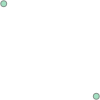

In [14]:
# 在jupyter notebook或jupyter lab中可以图像的形式直接显示GeoSeries中的单个元素：  [0]表示第一个元素
gpd.GeoSeries([geometry.MultiPoint([(0, 1), (1, 0)]),
               geometry.MultiPoint([(0, 0), (1, 1)])],
              index=['a', 'b'])[0]

##### 1.1.3 LineString  
对应shapely中的LineString，用于表示由多个点按顺序连接而成的线。 

下面我们创建一个由若干LineString对象组成的GeoSeries：

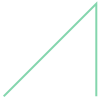

In [9]:
# 创建存放LineString对象的GeoSeries
# 这里shapely.geometry.LineString([(x1, y1), (x2, y2), ...])用于创建多点按顺序连接而成的线段
gpd.GeoSeries([geometry.LineString([(0, 0), (1, 1), (1, 0)]),
               geometry.LineString([(0, 0), (0, 1), (-1, 0)])],
              index=['a', 'b'])[0]

##### 1.1.4 MultiLineString  
对应shapely中的MultiLineString，用于表示多条线段的集合。 

下面我们创建一个由若干MultiLineString对象组成的GeoSeries：

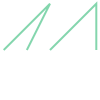

In [13]:
# 创建存放MultiLineString对象的GeoSeries
# 这里shapely.geometry.MultiLineString([LineString1, LineString2])用于创建多条线段的集合
gpd.GeoSeries([geometry.MultiLineString([[(0, 0), (1, 1), (1, 0)],
                                        [(-0.5, 0), (0, 1), (-1, 0)]])],
              index=['a'])[0]

##### 1.1.5 Polygon(无孔)

geopandas中的Polygon对应shapely中的Polygon，用于表示面，根据内部有无孔洞可继续细分。 

下面我们创建一个由无孔Polygon对象组成的GeoSeries：

In [15]:
# 创建存放无孔Polygon对象的GeoSeries
# 这里shapely.geometry.Polygon([(x1, y1), (x2, y2),...])用于创建无孔面
gpd.GeoSeries([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['a'])

a    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
dtype: geometry

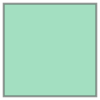

In [16]:
#同样地，直接显示第一个元素：
gpd.GeoSeries([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['a'])[0]

##### 1.1.6 Polygon(有孔)  
区分于上文中的无孔Polygon，下面我们创建一个由有孔Polygon对象组成的GeoSeries：

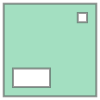

In [18]:
# 创建存放有孔Polygon对象的GeoSeries
# 这里shapely.geometry.Polygon(polygonExteriors, interiorCoords)用于创建有孔面
# 其中polygonExteriors用于定义整个有孔Polygon的外围，是一个无孔的多边形
# interiorCoords是用于定义内部每个孔洞（本质上是独立的多边形）的序列
t=gpd.GeoSeries([geometry.Polygon([(0,0),(10,0),(10,10),(0,10)],
                                [((1,3),(5,3),(5,1),(1,1)),
                                 ((9,9),(9,8),(8,8),(8,9))])])
t[0]

##### 1.1.7 MultiPolygon  
对应shapely中的MultiPolygon，用于表示多个面的集合。

下面我们创建一个由MultiPolygon对象组成的GeoSeries：

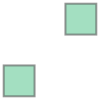

In [19]:
# 创建存放MultiPolygon对象的GeoSeries
# 这里shapely.geometry.MultiPolygon([Polygon1, Polygon2])用于创建多个面的集合
t=gpd.GeoSeries([geometry.MultiPolygon([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]),
                                      geometry.Polygon([(2, 2), (2, 3), (3, 3), (3, 2), (2, 2)])])],
              index=['a'])
t[0]

##### 1.1.8 LinearRing  
LinearRing对应shapely.geometry中的LinearRing，是一种特殊的几何对象。 

可以理解为闭合的线或无孔多边形的边框，创建时传入数据的格式与Polygon相同。

下面我们创建一个由LinearRing对象组成的GeoSeries：

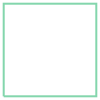

In [20]:
# 创建存放LinearRing对象的GeoSeries
# 这里shapely.geometry.LinearRing([(x1, y1), (x2, y2),...])用于创建LinearRing
t=gpd.GeoSeries([geometry.LinearRing([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['a'])
t[0] #显示第一个元素，可以看出LinearRing就是无孔多边形的边框线：

在同一个GeoSeries可以混合上述类型中的多种几何对象，这意味着点线面在概念上相异的几何对象可以共存于同一份数据中

#### 1.2 GeoSeries常用属性
类似pandas中的Series，GeoSeries在被创建完成之后也拥有很多实用的地理属性，下面对其中较为常用的进行列举：

##### 1.2.1 area
area属性返回与GeoSeries中每个元素一一对应的面积值（这里的面积单位和下文涉及的长度单位取决于投影坐标系。

之后关于geopandas投影坐标系管理的文章将会详细介绍，这里仅做演示）：

<AxesSubplot:>

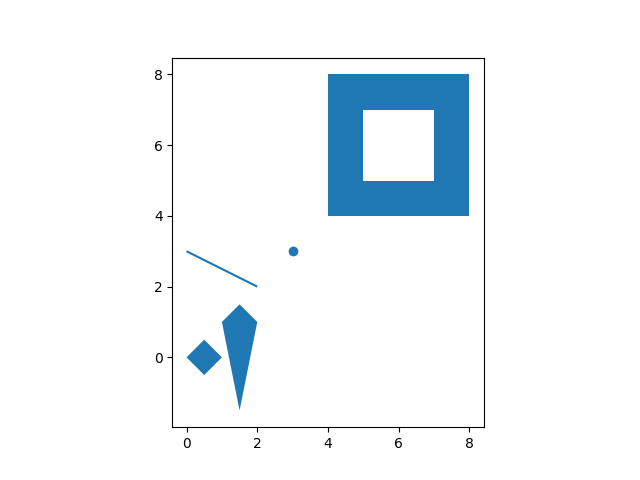

In [22]:
# 创建混合点线面的GeoSeries，这里第5个有孔多边形内部空洞创建时使用[::-1]颠倒顺序
# 是因为GeoSeries.plot()方法绘制有孔多边形的一个bug，即外部边框与内部孔洞创建时坐标
# 方向同为顺时针或顺时针时内部孔洞会自动被填充，如果你对这个bug感兴趣，可以前往
# https://github.com/geopandas/geopandas/issues/951查看细节
s = gpd.GeoSeries([geometry.Polygon([(0, 0), (0.5, 0.5), (1, 0), (0.5, -0.5)]),
                   geometry.Polygon([(1, 1), (1.5, 1.5), (2, 1), (1.5, -1.5)]),
                   geometry.Point(3, 3),
                   geometry.LineString([(2, 2), (0, 3)]),
                   geometry.Polygon([(4, 4), (8, 4), (8, 8), (4, 8)],
                                [[(5, 5), (7, 5), (7, 7), (5, 7)][::-1]])])

# 在jupyter中开启matplotlib交互式绘图模式
%matplotlib widget
s.plot() # 对s进行简单的可视化

In [23]:
#可以看到，s中包含了多种几何对象，下面直接得到s的面积：
s.area

0     0.5
1     1.5
2     0.0
3     0.0
4    12.0
dtype: float64

##### 1.2.2 bounds
bounds属性返回每个几何对象所在box左下角、右上角的坐标信息：

In [24]:
s.bounds

,minx,miny,maxx,maxy
0,0.0,-0.5,1.0,0.5
1,1.0,-1.5,2.0,1.5
2,3.0,3.0,3.0,3.0
3,0.0,2.0,2.0,3.0
4,4.0,4.0,8.0,8.0


##### 1.2.3 length
length属性返回每个几何对象边长：

In [25]:
s.length

0     2.828427
1     6.513233
2     0.000000
3     2.236068
4    24.000000
dtype: float64

##### 1.2.4 geom_type
geom_type返回每个几何对象类型：

In [26]:
s.geom_type

0       Polygon
1       Polygon
2         Point
3    LineString
4       Polygon
dtype: object

##### 1.2.5 exterior与interiors
对于多边形对象，exterior返回LinearRing格式的外边框线，对于有孔多边形，interiors返回所有内部孔洞LinearRing格式边框线集合：

In [27]:
s.exterior

0    LINESTRING (0.00000 0.00000, 0.50000 0.50000, ...
1    LINESTRING (1.00000 1.00000, 1.50000 1.50000, ...
2                                                 None
3                                                 None
4    LINESTRING (4.00000 4.00000, 8.00000 4.00000, ...
dtype: geometry

##### 1.2.6 is_valid
在shapely中涉及到很多拓扑计算操作时，对几何对象的合法性有要求。

譬如定义多边形时坐标按顺序连线时穿过了之前定义的边就属于非法，因为geopandas对矢量对象的计算依赖于shapely，于是引进了属性用于判断每个几何对象是否合法。

下面我们创建两个形状相同的多边形，其中一个满足上述所说的非法情况，另一个由两个多边形拼接而成：

In [28]:
s_ = gpd.GeoSeries([geometry.Polygon([(4, 0), (6, 1), (4, 1), (6, 0)]),
               geometry.MultiPolygon([geometry.Polygon([(4, 0), (5, 0.5), (6, 0)]),
                                      geometry.Polygon([(5, 0.5), (6, 1), (4, 1)])])])

In [29]:
#查看s_.is_valid，可以看出第一个自相交的多边形非法：
s_.is_valid

0    False
1     True
dtype: bool

##### 1.2.7 boundary
boundary返回每个几何对象的低维简化表示（点对象无具体的更低维简化，故无返回值）：

<AxesSubplot:>

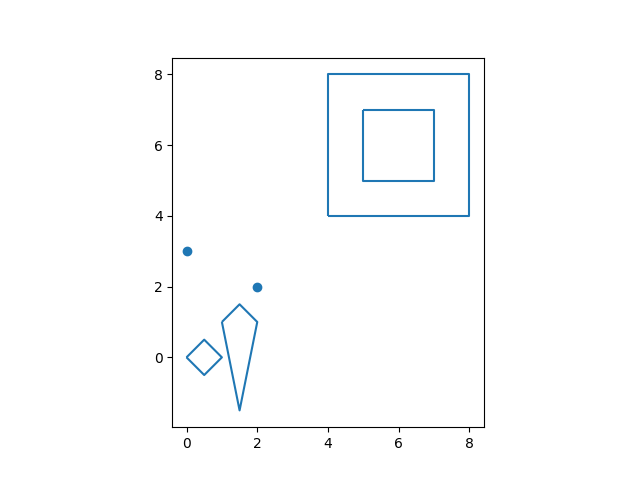

In [30]:
s.boundary.plot()

##### 1.2.8 centroid
centroid返回每个几何对象的重心（几何中心）：

In [31]:
s.centroid

0    POINT (0.50000 -0.00000)
1     POINT (1.50000 0.33333)
2     POINT (3.00000 3.00000)
3     POINT (1.00000 2.50000)
4     POINT (6.00000 6.00000)
dtype: geometry

<AxesSubplot:>

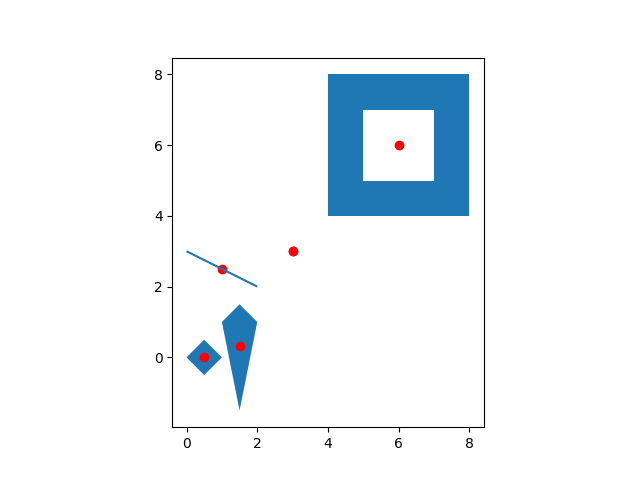

In [33]:
ax=s.plot()
s.centroid.plot(ax=ax,color='red')

##### 1.2.9 convex_hull   
convex_hull返回每个几何对象的凸包，Polygon格式，即恰巧包含对应几何对象的凸多边形：

<AxesSubplot:>

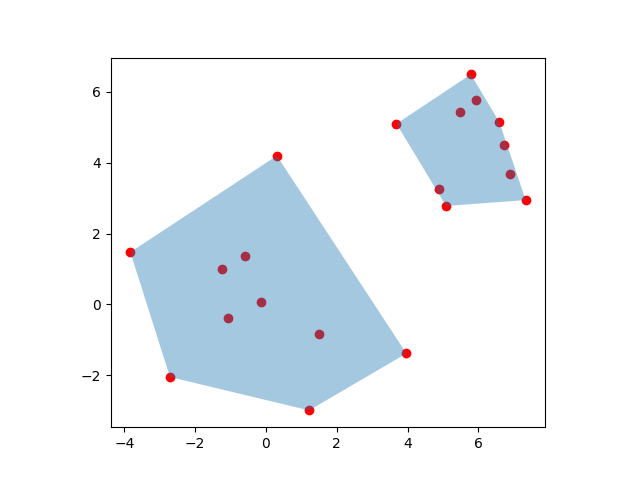

In [34]:
import numpy as np

# 利用独立的正态分布随机数创建两个MultiPoint集合
s__ = gpd.GeoSeries([geometry.MultiPoint(np.random.normal(loc=0, scale=2, size=[10, 2]).tolist()),
               geometry.MultiPoint(np.random.normal(loc=5, scale=2, size=[10, 2]).tolist())])

ax = s__.plot(color='red') # 绘制s__
s__.convex_hull.plot(ax=ax, alpha=0.4) # 叠加绘制各自对应凸包，调低填充透明度以显示更明显

##### 1.2.10 envelope
envelope属性返回对应几何对象的box范围，Polygon格式，即包含对应元素中所有点的最小矩形：

<AxesSubplot:>

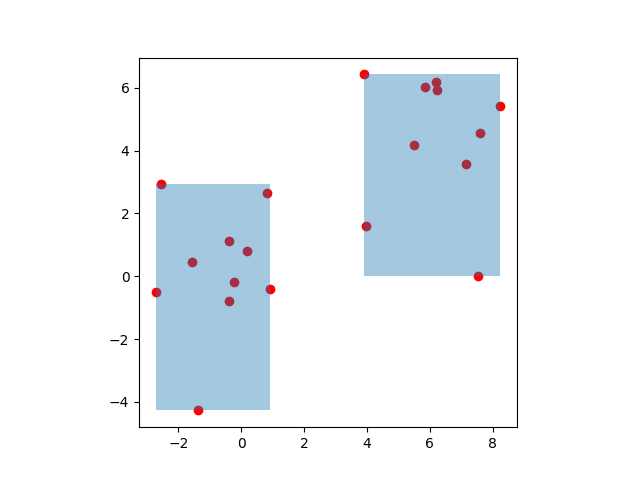

In [35]:
import numpy as np

# 创建两团独立的MultiPoint
s__ = gpd.GeoSeries([geometry.MultiPoint(np.random.normal(loc=0, scale=2, size=[10, 2]).tolist()),
               geometry.MultiPoint(np.random.normal(loc=5, scale=2, size=[10, 2]).tolist())])

ax = s__.plot(color='red') # 绘制s__
s__.envelope.plot(ax=ax, alpha=0.4) # 叠加绘制各自对应envelope，调低填充透明度以显示更明显

### 2.GeoDataFrame  
#### 2.1 GeoDataFrame基础  
顾名思义，geopandas中的GeoDataFrame是在pandas.DataFrame的基础上，加入空间分析相关内容进行改造而成。

其最大特点在于其在原有数据表格基础上增加了一列GeoSeries使得其具有矢量性，所有对于GeoDataFrame施加的空间几何操作也都作用在这列指定的几何对象之上。

下面我们举个简单的例子，基于不同均值和标准差的正态分布随机数，创建GeoDataFrame来记录这些信息：

In [36]:
contents = [(loc, 0.5) for loc in range(0, 10, 2)]
geo_df = gpd.GeoDataFrame(data=contents,
                          geometry=[geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist())
                                    for loc, scale in contents],
                          columns=['均值', '标准差'])
geo_df

,均值,标准差,geometry
0,0,0.5,"MULTIPOINT (0.27587 -0.50914, 0.23518 0.20932,..."
1,2,0.5,"MULTIPOINT (1.23426 2.50256, 2.19188 1.84550, ..."
2,4,0.5,"MULTIPOINT (4.74346 4.05361, 4.08625 3.43366, ..."
3,6,0.5,"MULTIPOINT (5.47218 5.42885, 6.64072 6.34243, ..."
4,8,0.5,"MULTIPOINT (7.96056 8.34619, 7.31607 7.50236, ..."


其中定义GeoDataFrame时作为每行所关联几何对象的GeoSeries需要通过geometry参数指定，而除了用上述的方式创建GeoDataFrame，先创建数据表，再添加矢量信息列亦可。

这时几何对象列的名称可以自由设置，但一定要利用GeoDataFrame.set_geometry()方法将后添加的矢量列指定为矢量主列。因为每个GeoDataFrame若在定义之处没有指定矢量列，后将无法进行与适量信息挂钩的所有操作（GeoSeries所有属性都可同样作用于GeoDataFrame，因为所有空间操作实际上都直接作用于其矢量主列）：

* 2.1.1 添加矢量列但未定义

In [37]:
geo_df = gpd.GeoDataFrame(contents, columns=['均值', '标准差'])
geo_df['raw_points'] = [geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist())
                                    for loc, scale in contents]
# 尝试查看矢量类型
geo_df.geom_type

#这时所有直接针对GeoDataFrame的矢量相关操作都无法使用。

C:\Program Files\Python37\lib\site-packages\pandas\core\dtypes\cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Program Files\Python37\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


AttributeError: No geometry data set yet (expected in column 'geometry'.)

* 重新为GeoDataFrame指定矢量列


In [39]:
geo_df.set_geometry('raw_points')
#这时相关操作可正常使用：

,均值,标准差,raw_points
0,0,0.5,"MULTIPOINT (-0.90559 0.37692, 0.20156 -0.19525..."
1,2,0.5,"MULTIPOINT (2.99903 1.48248, 1.70472 1.76246, ..."
2,4,0.5,"MULTIPOINT (3.69941 3.68678, 3.16383 4.79682, ..."
3,6,0.5,"MULTIPOINT (5.95369 5.94916, 5.62126 5.31593, ..."
4,8,0.5,"MULTIPOINT (8.20895 8.02670, 8.24323 8.40698, ..."


* 多个矢量列切换  
通过前面的内容，我们知道了每个GeoDataFrame都有一个矢量主列，相关操作例如绘图都基于此列。 

实际上GeoDataFrame允许表中存在多个矢量列，只要求任意时刻有且仅有1列为矢量主列即可。 

因此我们可以在一个GeoDataFrame中保存多列矢量，需要用到哪列时再进行切换即可，如下面的例子： 

C:\Program Files\Python37\lib\site-packages\pandas\core\dtypes\cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Program Files\Python37\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

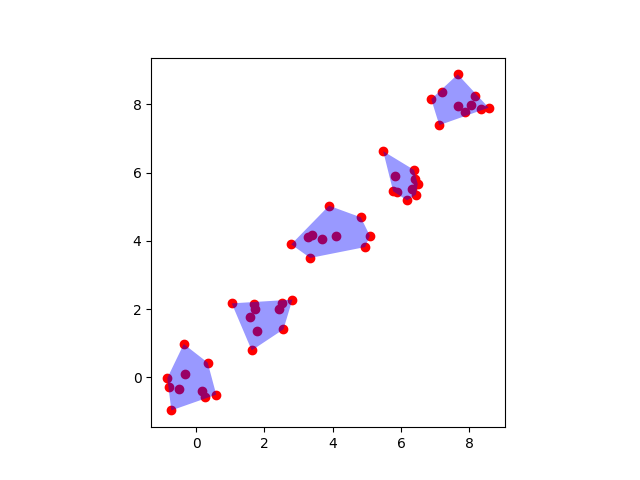

In [42]:
geo_df = gpd.GeoDataFrame(contents, columns=['均值', '标准差'])
geo_df['raw_points'] = [geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist())
                                    for loc, scale in contents]
geo_df.set_geometry('raw_points', inplace=True) # inplace=True表示对原数据进行更新

# 绘制第一图层
ax = geo_df.plot(color='red')
geo_df['convex_hull'] = geo_df.convex_hull
# 切换矢量主列
geo_df.set_geometry('convex_hull', inplace=True)

# 绘制第二图层
geo_df.plot(ax=ax, color='blue', alpha=0.4)

### 2.2 GeoDataFrame数据索引
作为pandas.DataFrame的延伸，GeoDataFrame同样支持pandas.DataFrame中的.loc以及.iloc对数据在行、列尺度上进行索引和筛选。

这里我们以geopandas自带的世界地图数据为例：

<AxesSubplot:>

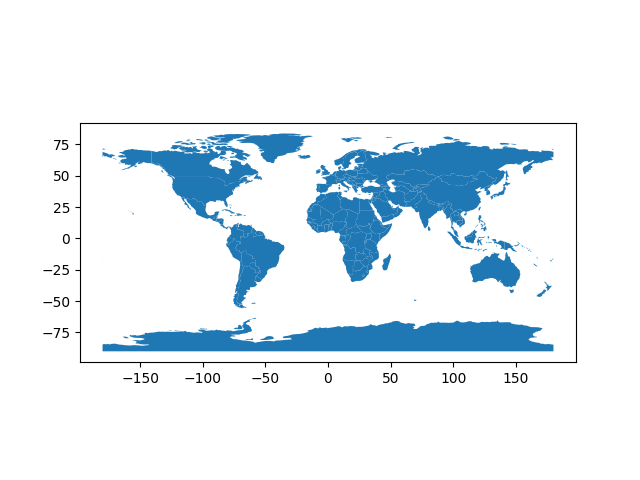

In [43]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [44]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [45]:
#使用.loc+条件筛选选择数据：
#选择人口10亿以上的pop_est,name列
world.loc[world['pop_est']>1000000000,['pop_est','name']]

,pop_est,name
98,1281935911,India
139,1379302771,China


In [46]:
#使用.iloc选择数据：
#选择前10行前4列的数据
world.iloc[:10,:4]

,pop_est,continent,name,iso_a3
0,920938,Oceania,Fiji,FJI
1,53950935,Africa,Tanzania,TZA
2,603253,Africa,W. Sahara,ESH
3,35623680,North America,Canada,CAN
4,326625791,North America,United States of America,USA
5,18556698,Asia,Kazakhstan,KAZ
6,29748859,Asia,Uzbekistan,UZB
7,6909701,Oceania,Papua New Guinea,PNG
8,260580739,Asia,Indonesia,IDN
9,44293293,South America,Argentina,ARG


而除了这些常规的数据索引方式之外，geopandas为GeoDataFrame添加了.cx索引方式，可以传入所需的空间范围，用于索引与传入范围相交的对应数据：

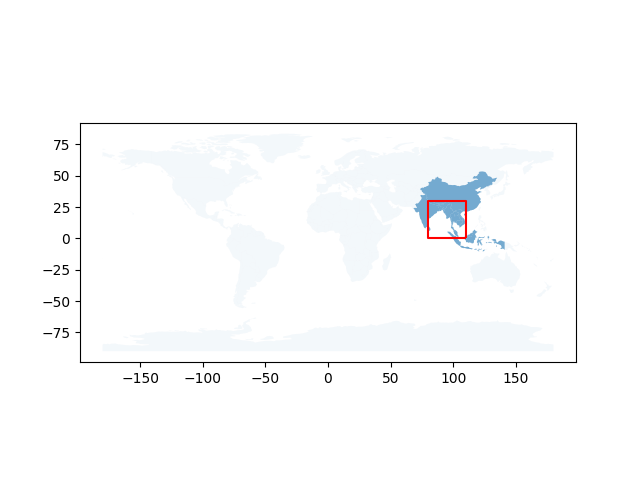

In [47]:
# 选择与东经80度-110度，北纬0度-30度范围相交的几何对象
part_world = world.cx[80:110, 0:30]

# 绘制第一图层：世界地图
ax = world.plot(alpha=0.05)
# 绘制第二图层：.cx所选择的地区
ax = part_world.plot(ax=ax, alpha=0.6)
# 绘制第三图层：.cx条件示意图
ax = gpd.GeoSeries([geometry.box(minx=80, miny=0, maxx=110, maxy=30).boundary])\
    .plot(ax=ax, color='red')